# Daten

In [2]:
# Datenmanipulation, -analyse & -verarbeitung
import pandas as pd
import numpy as np

# Visualisierung
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## alter_geschlecht

In [3]:
# --- alter_geschlecht
alter_geschlecht = pd.read_csv('alter_geschlecht.csv')
print(f'Anzahl Beobachtungen: {alter_geschlecht.shape[0]}')
alter_geschlecht.head()

Anzahl Beobachtungen: 508146


,id,Geschlecht,Alter
0,170727,Male,42
1,41795,Male,24
2,369321,Female,30
3,500463,Female,32
4,327695,Male,34


- **ID:** ID des Kunden
- **Geschlecht:** Geschlecht des Kunden
- **Alter:** Alter des Kunden (in Jahren)

In [4]:
#keine fehlenden Werten
alter_geschlecht.isna().sum()

id            0
Geschlecht    0
Alter         0
dtype: int64

In [5]:
#keine Duplikate (ganze Zeilen) in den Variablen
alter_geschlecht.duplicated().sum()

0

In [6]:
#keine Duplikate (ID) in den Variablen
alter_geschlecht.duplicated(subset=['id']).sum()

0

## interesse

In [7]:
# --- Interesse 
interesse = pd.read_csv('interesse.csv')
print(f'Anzahl Beobachtungen: {interesse.shape[0]}')
interesse.head()

Anzahl Beobachtungen: 381109


,id,Interesse
0,1,1.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,0.0


- **ID:** ID des Kunden
- **Interesse:** Kunde ist an Angebot interessiert (Ja=1)

In [8]:
#Keine fehlenden Werte
interesse.isna().sum()

id           0
Interesse    0
dtype: int64

In [9]:
#Keine Duplikate
interesse.duplicated().sum()

0

In [10]:
interesse.duplicated(subset=['id']).sum()

0

In [11]:
# Es gibt rund 130.000 Beobachtungen mehr für alter_geschlecht als in interesse
# Diese Beobachtungen gehen verloren, da Interesse die zu prognostizierende Zielvariable ist
len(set(alter_geschlecht['id']) - set(interesse['id']))

127037

## rest

In [12]:
# --- rest
rest = pd.read_csv('rest.csv', sep=';')
print(f'Anzahl Beobachtungen: {rest.shape[0]}')
rest.head()

Anzahl Beobachtungen: 508146


,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,id
0,1,15.0,1,1-2 Year,No,2630.0,124.0,74,317635
1,1,28.0,0,1-2 Year,Yes,2630.0,125.0,213,337993
2,1,33.0,0,1-2 Year,Yes,27204.0,124.0,114,160325
3,1,46.0,1,< 1 Year,No,31999.0,152.0,251,141620
4,1,49.0,0,1-2 Year,Yes,28262.0,26.0,60,75060


- **ID**: ID des Kunden
- **Fahrerlaubnis:** Kunde hat Fahrlerlaubnis (Ja=1)
- **Regional_Code:** Eindeutiger Code für Region des Wohnorts des Kunden
- **Vorversicherung:** Kunde hat bereits eine Kfz-Versicherung (Ja=1)
- **Alter_Fzg:** Alter des Fahrzeugs
- **Vorschaden:** Kunde hatte bereits einen Schaden am Fzg (Ja=Yes)
- **Jahresbeitrag:** Erwarteter Versicherungsbeitrag bei Abschluss in €
- **Vertriebskanal:** Code für den Vertriebskanal
- **Kundentreue:** Anzahl der Tage seit dem Zeitpunkt, ab dem eine Kundenbeziehung mit dem
Kunden besteht

In [13]:
#Keine fehlenden Werte
rest.isna().sum()

Fahrerlaubnis      0
Regional_Code      0
Vorversicherung    0
Alter_Fzg          0
Vorschaden         0
Jahresbeitrag      0
Vertriebskanal     0
Kundentreue        0
id                 0
dtype: int64

In [14]:
#Keine Duplikate
rest.duplicated().sum()

0

In [15]:
rest.duplicated(subset=['id']).sum()

0

In [16]:
# Das gleiche gilt für rest und interesse
len(set(rest['id']) - set(interesse['id']))

127037

In [17]:
"Nicht nutzbare Beobachtungen: {:.1%}".format(len(set(rest['id']) - set(interesse['id'])) / rest.shape[0])

'Nicht nutzbare Beobachtungen: 25.0%'

## Vereinigung der drei Datensätze

In [18]:
# Keine Duplikate und keine fehlenden Daten in den drei Datensätzen 
# Daher direkte Vereinigung aller DataFrames
# Aber: Verlust von 127.037 Beobachtungen (25%)

# join alter_geschlecht auf interesse
df = interesse.merge(alter_geschlecht, on='id', how='left')

# join rest auf interesse
df = df.merge(rest, on='id', how='left')

print(f'Uns stehen insgesamt {df.shape[0]} Beobachtungen zur Verfügung')
df

Uns stehen insgesamt 381109 Beobachtungen zur Verfügung


,id,Interesse,Geschlecht,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue
0,1,1.0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,2,0.0,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,3,1.0,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,4,0.0,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,5,0.0,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0.0,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88
381105,381106,0.0,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131
381106,381107,0.0,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161
381107,381108,0.0,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74


# Explorative Datenanalyse

## Zielvariable

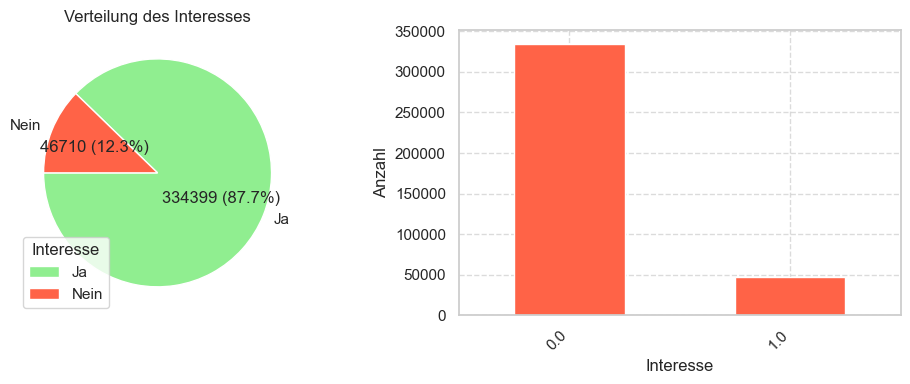

In [19]:
# stark unbalancierte Klassen der Zielvariablen -> Notwendigkeit einer Behandlung
## Ansonsten: Gefahr für nicht aussagekräftige Performanz,
##bzw. schlechte Performanz für die Prognose von Interesse = 1
plt.figure(figsize=(10,4))

plt.subplot(121)

interest_counts = df['Interesse'].value_counts()
labels = ['Ja', 'Nein']
colors = ['lightgreen', 'tomato']

plt.pie(interest_counts, labels=labels, colors=colors, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(interest_counts) / 100, p), startangle=180)

plt.title('Verteilung des Interesses')

plt.legend(title='Interesse', labels=labels, loc='best')

plt.subplot(122)
df['Interesse'].value_counts().plot(kind='bar', color='tomato')

plt.xlabel('Interesse')
plt.ylabel('Anzahl')
#plt.title('Verteilung des Interesses')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
#Lösung: Random Undersampling: Zufällig Beobachtungen aus der dominanten Klasse ziehen, bis beide Klassen ausgeglichen sind
#zufällig 46710 Beobachtungen der Ausprägung Interesse = 0 ziehen
interesse0_sample = df.loc[df['Interesse'] == 0.0].sample(n=46710)
interesse0_sample

,id,Interesse,Geschlecht,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue
1545,1546,0.0,Female,39,1,50.0,1,1-2 Year,No,23908.0,18.0,122
104229,104230,0.0,Male,48,1,28.0,0,1-2 Year,Yes,53248.0,124.0,59
311692,311693,0.0,Male,24,1,45.0,1,< 1 Year,No,22440.0,152.0,223
370067,370068,0.0,Male,28,1,36.0,0,< 1 Year,Yes,2630.0,160.0,109
301055,301056,0.0,Male,24,1,11.0,0,< 1 Year,Yes,40157.0,124.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
341914,341915,0.0,Male,63,1,28.0,0,> 2 Years,Yes,49627.0,26.0,28
65354,65355,0.0,Female,24,1,28.0,1,< 1 Year,No,46549.0,152.0,187
86123,86124,0.0,Male,38,1,28.0,0,1-2 Year,Yes,42342.0,26.0,123
8444,8445,0.0,Male,22,1,39.0,0,< 1 Year,Yes,38673.0,152.0,66


In [21]:
#Konkatenation
df = pd.concat([df.loc[df['Interesse'] == 1.0], interesse0_sample])
df

,id,Interesse,Geschlecht,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue
0,1,1.0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
2,3,1.0,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
7,8,1.0,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72
10,11,1.0,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46
15,16,1.0,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147
...,...,...,...,...,...,...,...,...,...,...,...,...
341914,341915,0.0,Male,63,1,28.0,0,> 2 Years,Yes,49627.0,26.0,28
65354,65355,0.0,Female,24,1,28.0,1,< 1 Year,No,46549.0,152.0,187
86123,86124,0.0,Male,38,1,28.0,0,1-2 Year,Yes,42342.0,26.0,123
8444,8445,0.0,Male,22,1,39.0,0,< 1 Year,Yes,38673.0,152.0,66


In [22]:
df["Interesse"].value_counts(normalize=True)

Interesse
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64

## Feature Variablen

### Numerische Variablen

In [23]:
#Keine Korrelation unter den numerischen Variablen - d.h. wir behalten alle 
df[['Alter', 'Jahresbeitrag', 'Kundentreue']].corr()

,Alter,Jahresbeitrag,Kundentreue
Alter,1.000000,0.094997,-0.001690
Jahresbeitrag,0.094997,1.000000,0.006335
Kundentreue,-0.001690,0.006335,1.000000


In [24]:
# Wertebereiche scheinen realistisch zu sein, Jahresbeitrag hat aber ein paar extrem hohe Werte
df[['Alter', 'Jahresbeitrag', 'Kundentreue']].describe()

,Alter,Jahresbeitrag,Kundentreue
count,93420.000000,93420.000000,93420.000000
mean,40.846971,30954.582959,154.018957
std,14.359023,17615.893718,83.755937
min,20.000000,2630.000000,10.000000
25%,27.000000,24553.000000,81.000000
50%,41.000000,32210.000000,154.000000
75%,50.000000,40262.000000,227.000000
max,85.000000,540165.000000,299.000000


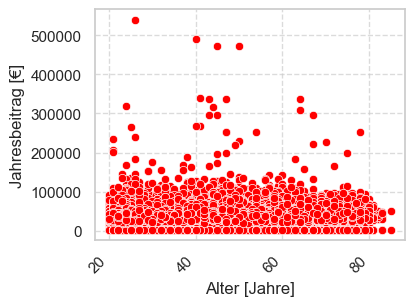

In [25]:
#Grafik bestätigt: Keine Auffälligkeiten hinsichtlich pot. Korrelation
##Aber: Jahresbeitrag weist Ausreißerwerte auf
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Alter', y='Jahresbeitrag', color='red')

plt.xlabel('Alter [Jahre]')
plt.ylabel('Jahresbeitrag [€]')
#plt.title('Scatterplot von Alter und Jahresbeitrag')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

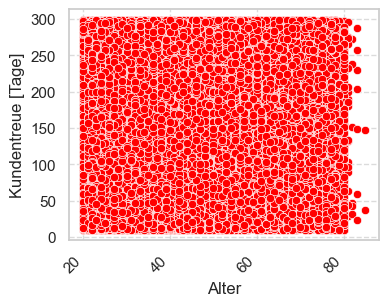

In [26]:
#Grafik bestätigt: Keine Auffälligkeiten hinsichtlich pot. Korrelation
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Alter', y='Kundentreue', color='red')

plt.xlabel('Alter')
plt.ylabel('Kundentreue [Tage]')
#plt.title('Scatterplot von Alter und Jahresbeitrag')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

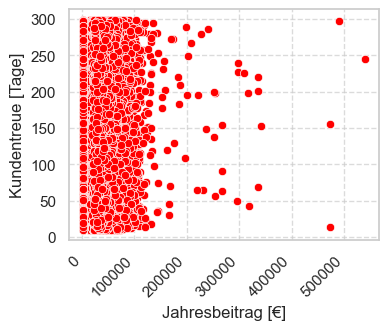

In [27]:
#Grafik bestätigt: Keine Auffälligkeiten hinsichtlich pot. Korrelation
##Aber: Jahresbeitrag weist Ausreißerwerte auf
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Jahresbeitrag', y='Kundentreue', color='red')

plt.xlabel('Jahresbeitrag [€]')
plt.ylabel('Kundentreue [Tage]')
#plt.title('Scatterplot von Alter und Jahresbeitrag')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

#### Alter

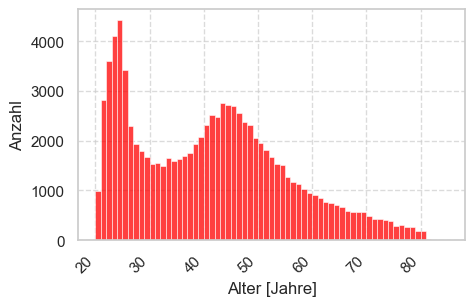

In [28]:
#etwas rechtsschief, aber nicht zu stark
plt.figure(figsize=(5,3))
sns.histplot(df['Alter'],color='red')

plt.xlabel('Alter [Jahre]')
plt.ylabel('Anzahl')
#plt.title('Histogramm der Altersverteilung')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.show()

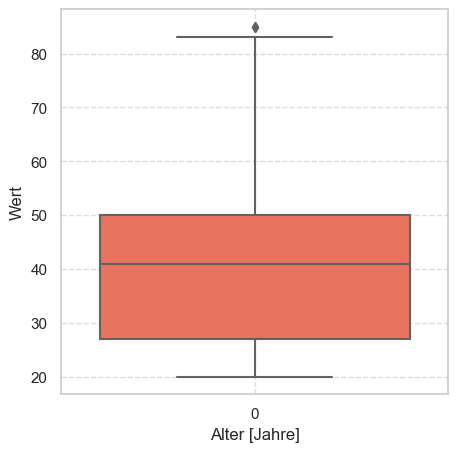

In [29]:
# Sehr wenig Ausreißer, etwas rechtsschief: Keine Behandlung notwendig
plt.figure(figsize=(5,5))
sns.boxplot(df['Alter'], color='tomato')

plt.xlabel('Alter [Jahre]')
plt.ylabel('Wert')
#plt.title('Boxplot der Altersverteilung')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [30]:
#Das mittlere Alter unterscheidet sich für Kunden mit und ohne Interesse -> Verwenden als Feature-Variable
df.groupby('Interesse')['Alter'].mean()

Interesse
0.0    38.258382
1.0    43.435560
Name: Alter, dtype: float64

#### Jahresbeitrag

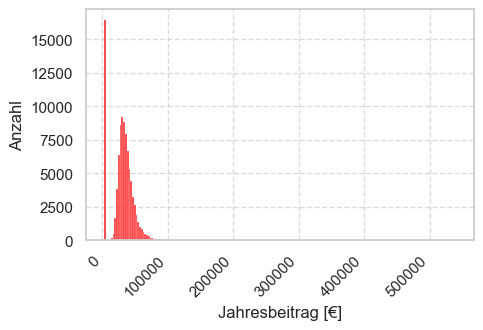

In [31]:
#rechtsschief, bzw. Peak bei ca. 2700€ - Aufteilung in Klassen?
plt.figure(figsize=(5,3))
sns.histplot(df['Jahresbeitrag'],color='red', bins=200)

plt.xlabel('Jahresbeitrag [€]')
plt.ylabel('Anzahl')
#plt.title('Histogramm des Jahresbeitrags')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.show()

In [32]:
print(f"Der Peak-Wert liegt bei: {df['Jahresbeitrag'].mode()[0]}€")

Der Peak-Wert liegt bei: 2630.0€


In [33]:
## Da sehr viele Beobachtungen einen sehr kleinen Jahresbeitrag haben:
## Überlegung: Aufteilen in Klassen: Bspw. < 3000 und > 3000
## Würde jedoch zu unausgeglichenen Daten führen

print(f"Jahresbeitrag unter 3.000€: {df.loc[df['Jahresbeitrag'] < 3000, 'Interesse'].sum()} Beobachtungen")
print(f"Jahresbeitrag über 3.000€: {df.loc[df['Jahresbeitrag'] >= 3000, 'Interesse'].sum()} Beobachtungen")

Jahresbeitrag unter 3.000€: 8505.0 Beobachtungen
Jahresbeitrag über 3.000€: 38205.0 Beobachtungen


In [34]:
## Keine weitere sinnvolle Aufteilung in Klassen

print(f"Jahresbeitrag unter 3.000€ {df.loc[df['Jahresbeitrag'] < 3000, 'Interesse'].sum()}")
print(f"Jahresbeitrag zwischen 3.000€ und 10.000€ {df.loc[(df['Jahresbeitrag'] >= 3000) & (df['Jahresbeitrag'] < 10000), 'Interesse'].sum()}")
print(f"Jahresbeitrag zwischen 10.000€ und 30.000€ {df.loc[(df['Jahresbeitrag'] >= 10000) & (df['Jahresbeitrag'] < 30000), 'Interesse'].sum()}")
print(f"Jahresbeitrag über 30.000€ {df.loc[df['Jahresbeitrag'] >= 30000, 'Interesse'].sum()}")

Jahresbeitrag unter 3.000€ 8505.0
Jahresbeitrag zwischen 3.000€ und 10.000€ 1.0
Jahresbeitrag zwischen 10.000€ und 30.000€ 10028.0
Jahresbeitrag über 30.000€ 28176.0


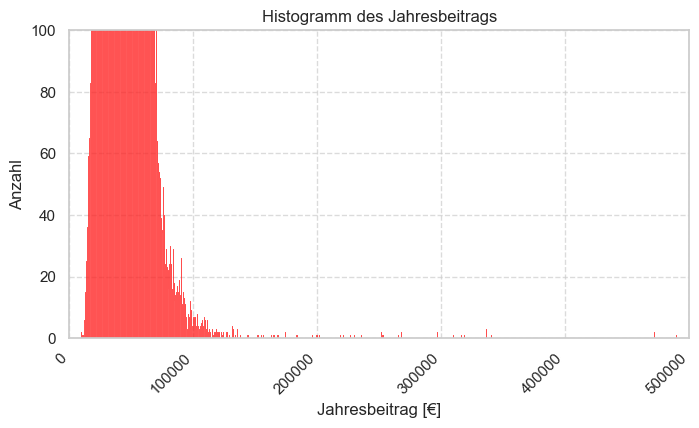

In [35]:
#Allerdings: Starke Ausreißer 
plt.figure(figsize=(8,4))
sns.histplot(df['Jahresbeitrag'], color='red')
plt.xlim(0,500000)
plt.ylim(0, 100)

plt.xlabel('Jahresbeitrag [€]')
plt.ylabel('Anzahl')
plt.title('Histogramm des Jahresbeitrags')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.show()

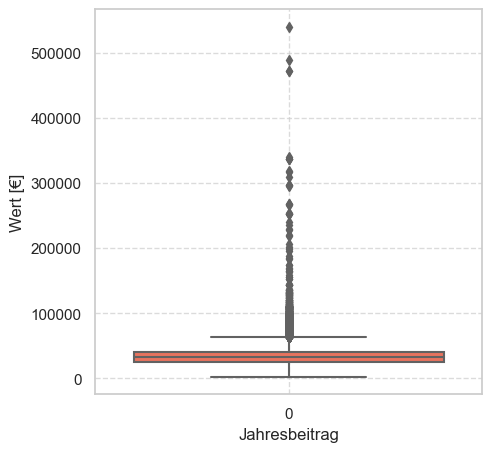

In [36]:
# Viele Ausreißer -> Behandlung
plt.figure(figsize=(5,5))
sns.boxplot(df['Jahresbeitrag'], color='tomato')

plt.xlabel('Jahresbeitrag')
plt.ylabel('Wert [€]')
#plt.title('Boxplot der Jahresbeitragsverteilung')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [37]:
#Beobachtungen ab 100.000€ Jahresbeitrag machen nur 2,9% der Beobachtungen aus
#Daher: Ausschluss von Ausreißern
"{:.6f}".format(len(df.loc[df['Jahresbeitrag'] > 62000]) / len(df))

'0.028912'

In [38]:
#Ausreißer können zwar wichtige Informationen darstellen, verzerren Modelle allerdings oftmals
#Daher wird beim Jahresbeitrag Ausreißer entfernt

#IQR-Methode anwenden, um Ausreißer zu identifizieren und entfernen
Q1 = df['Jahresbeitrag'].quantile(0.25)
Q3 = df['Jahresbeitrag'].quantile(0.75)

#Interquartilsabstand berechnen
IQR = Q3 - Q1

#Grenzen festlegen
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


old_shape = df.shape[0]
df = df[(df['Jahresbeitrag'] >= lower_bound) & (df['Jahresbeitrag'] <= upper_bound)]
print(f'Nach Ausreißerbehandlung haben wir noch {df.shape[0]} Beobachtungen, d.h. {old_shape-df.shape[0]} wurden entfernt')
print(f'Untere Grenze: {lower_bound} | Obere Grenze: {upper_bound}')

Nach Ausreißerbehandlung haben wir noch 91120 Beobachtungen, d.h. 2300 wurden entfernt
Untere Grenze: 989.5 | Obere Grenze: 63825.5


In [39]:
# Relativ wenig Unterschied in den Mittelwerten
#Aber: Aus inhaltlicher Sicht könnte der Jahrebeitrag wichtig sein
df.groupby('Interesse')['Jahresbeitrag'].mean()

Interesse
0.0    29288.251591
1.0    30173.460315
Name: Jahresbeitrag, dtype: float64

#### Kundentreue

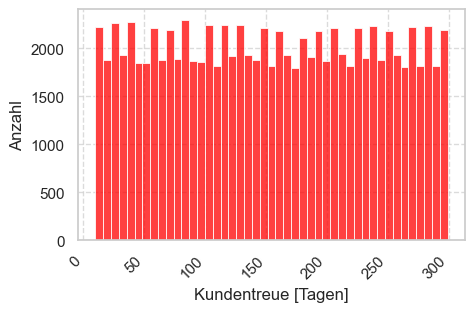

In [40]:
#sehr gleichverteilt - keine Maßnahmen nötig
plt.figure(figsize=(5,3))
sns.histplot(df['Kundentreue'], color='red')

plt.xlabel('Kundentreue [Tagen]')
plt.ylabel('Anzahl')
#plt.title('Histogramm der Verteilung zur Kundentreue')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.show()

<Axes: >

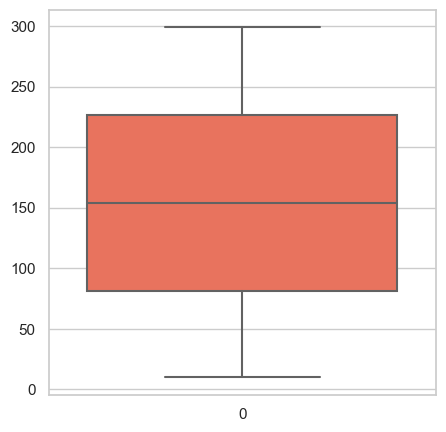

In [41]:
#Ausreißerbetrachtung: Keine Ausreißer
plt.figure(figsize=(5,5))
sns.boxplot(df['Kundentreue'], color='tomato')

In [42]:
#Auch hier: Fast kein Unterschied, dennoch aus inhaltlicher Sicht durchaus von Relevanz!
df.groupby('Interesse')['Kundentreue'].sum()

Interesse
0.0    7040671
1.0    6992357
Name: Kundentreue, dtype: int64

In [43]:
## Keine fehlenden Werte/Duplikate
## Ausreißerbehandlung bereits abgeschlossen
## Noch zu erledigen: Unterschiedliche Wertebereiche der numerischen Variablen müssen normalisiert werden!
## Ansonsten besteht die Gefahr, dass Variablen mit hohen Werten (Jahresbeitrag) in Machine Learning Modellen 
## ein höheres Gewicht bekommen als andere (Alter)
## zunächst werden alle Features verwendet, auch wenn Jahresbeitrag und Kundentreue scheinbar keine starke Prognosekraft aufweisen

### Kategorische Variablen

#### Geschlecht

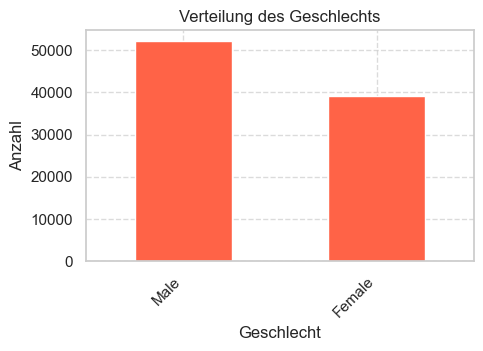

In [44]:
# Keine Auffälligkeiten - ausgewogene Klassen - Keine weitere Behandlung notwendig
df['Geschlecht'].value_counts().plot(kind='bar', figsize=(5,3), color='tomato')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.title('Verteilung des Geschlechts')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

In [45]:
#Geschlecht scheint insb. für die Vorhersage von positiver Kundenaffinität relevant zu sein
#Deutlich mehr Männer haben Interesse - Scheint ein relevantes Feature zu sein
pd.crosstab(df['Interesse'], df['Geschlecht'])

Geschlecht,Female,Male
Interesse,,
0.0,21348,24377
1.0,17691,27704


#### Fahrerlaubnis

Fahrerlaubnis
1    90965
0      155
Name: count, dtype: int64


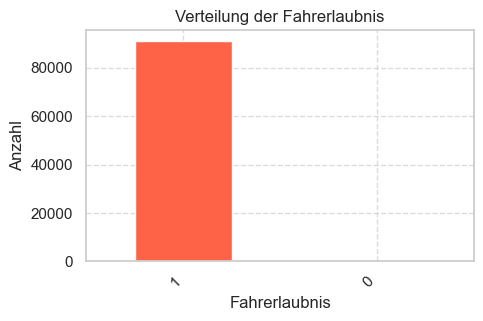

In [46]:
# stark unausgeglichene Klassen - fast keine Beobachtungen bei keiner Fahrerlaubnis
print(df['Fahrerlaubnis'].value_counts())
df['Fahrerlaubnis'].value_counts().plot(kind='bar', figsize=(5,3), color='tomato')

plt.xlabel('Fahrerlaubnis')
plt.ylabel('Anzahl')
plt.title('Verteilung der Fahrerlaubnis')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [47]:
#Bei Fahrerlaubnis = 1 kein Unterschied und bei Fahrerlaubnis = 0 Unterschied, aber fast keine Beobachtungen
#Daher: Evtl. keine Verwendung als Feature-Variable
#Aber inhaltliche relevanz gegeben, da Versicherung eigentlich nur für Personen mit Fahrerlaubnis in Frage kommt
pd.crosstab(df['Interesse'], df['Fahrerlaubnis'])

Fahrerlaubnis,0,1
Interesse,,
0.0,114,45611
1.0,41,45354


#### Regional Code

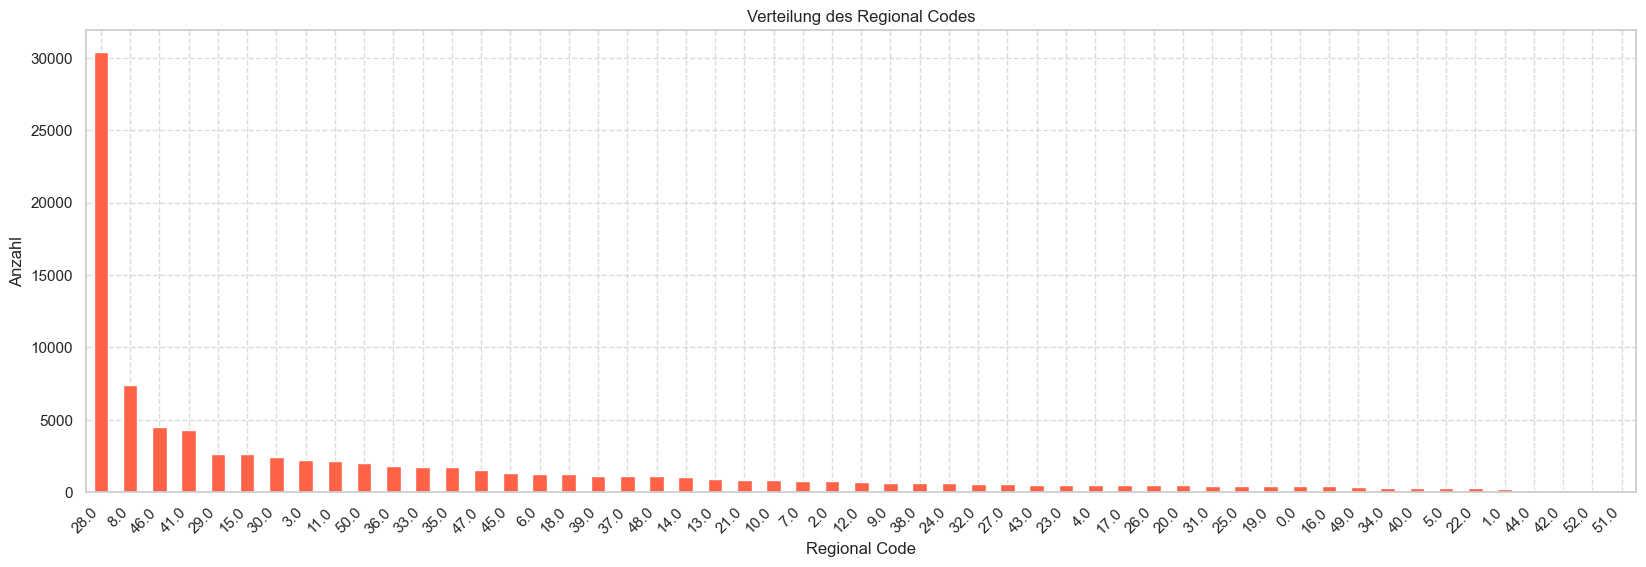

In [48]:
#Viele verschiedene Regionen 
#Umgehung der hohen Kardinalität durch Aggregation: Zusammenfassen zu Regional Code 28 8.0 und Rest
df['Regional_Code'].value_counts().plot(kind='bar', figsize=(20,6), color='tomato')

plt.xlabel('Regional Code')
plt.ylabel('Anzahl')
plt.title('Verteilung des Regional Codes')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

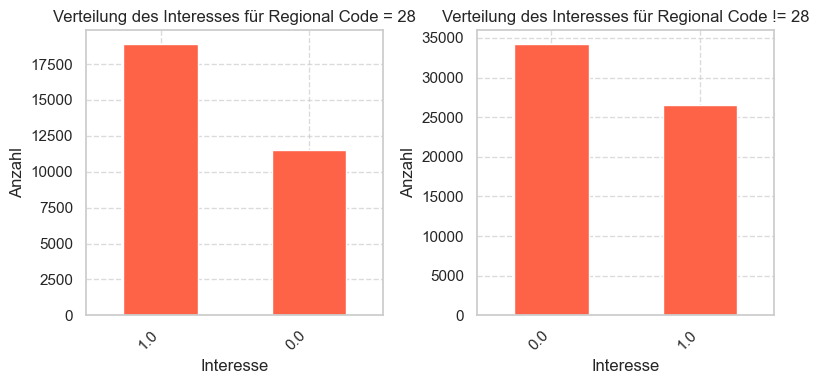

In [49]:
#Sinnvolle Trennung, da Regional_Code = 28.0 eher Interesse hat und der Rest eher keines
plt.figure(figsize=(8,4))

plt.subplot(121)

df.loc[df['Regional_Code'] == 28.0, 'Interesse'].value_counts().plot(kind='bar', color='tomato')

plt.xlabel('Interesse')
plt.ylabel('Anzahl')
plt.title('Verteilung des Interesses für Regional Code = 28')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(122)
df.loc[df['Regional_Code'] != 28.0, 'Interesse'].value_counts().plot(kind='bar', color='tomato')

plt.xlabel('Interesse')
plt.ylabel('Anzahl')
plt.title('Verteilung des Interesses für Regional Code != 28')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [64]:
#Klassen sind relativ ausgeglichen - == 28 hat ca doppelt so viele Beobachtungen, aber != 28 hat immerhin > 30000
print(df.loc[df['Regional_Code'] == 28.0].shape[0])
print(df.loc[df['Regional_Code'] != 28.0].shape[0])

30386
60734


#### Vorversicherung

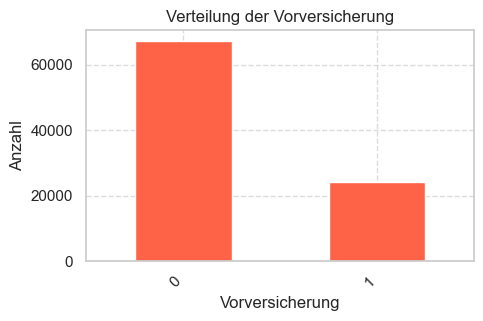

In [52]:
#Keine Auffälligkeiten - relativ ausgewogene Klassen
df['Vorversicherung'].value_counts().plot(kind='bar', figsize=(5,3), color='tomato')

plt.xlabel('Vorversicherung')
plt.ylabel('Anzahl')
plt.title('Verteilung der Vorversicherung')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [53]:
#Scheint starke Auswirkungen auf die Ausprägung von Interesse zu haben
#Daher: Auf jeden Fall Verwendung als Feature-Variable
pd.crosstab(df['Interesse'], df['Vorversicherung'])

Vorversicherung,0,1
Interesse,,
0.0,21830,23895
1.0,45240,155


#### Alter Fahrzeug

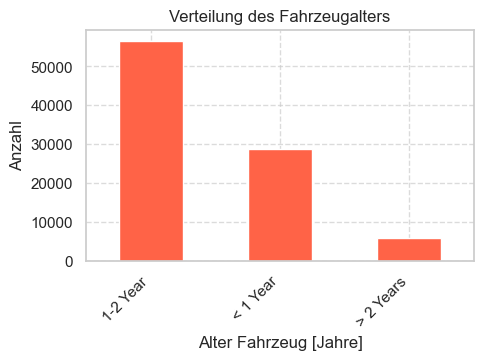

In [54]:
#Alter Fahrzeug - Keine Auffälligkeiten
df['Alter_Fzg'].value_counts().plot(kind='bar', figsize=(5,3), color='tomato')

plt.xlabel('Alter Fahrzeug [Jahre]')
plt.ylabel('Anzahl')
plt.title('Verteilung des Fahrzeugalters')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [55]:
#Relativ starke Unrterschiede in den Klassen zwischen Interesse = Ja und Interesse = Nein
#Daher: Auch Verwendung als Feature-Variable
pd.crosstab(df['Interesse'], df['Alter_Fzg'])

Alter_Fzg,1-2 Year,< 1 Year,> 2 Years
Interesse,,,
0.0,22688,21581,1456
1.0,33902,7082,4411


#### Vorschaden

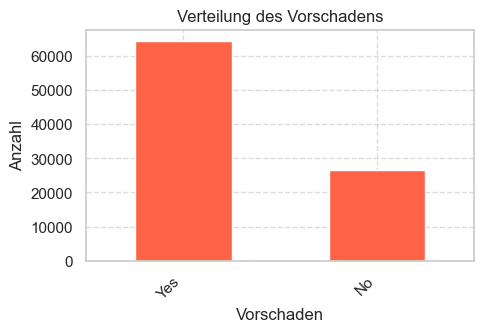

In [56]:
#Vorschaden - keine Auffälligkeiten
df['Vorschaden'].value_counts().plot(kind='bar', figsize=(5,3), color='tomato')

plt.xlabel('Vorschaden')
plt.ylabel('Anzahl')
plt.title('Verteilung des Vorschadens')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [57]:
#Ebenfalls scheinbar starke Prognosekraft, ob Interesse an einer Versicherung besteht
#Daher: Auf jeden Fall Verwendung als Feature-Variable
pd.crosstab(df['Interesse'], df['Vorschaden'])

Vorschaden,No,Yes
Interesse,,
0.0,25679,20046
1.0,968,44427


#### Vertriebskanal

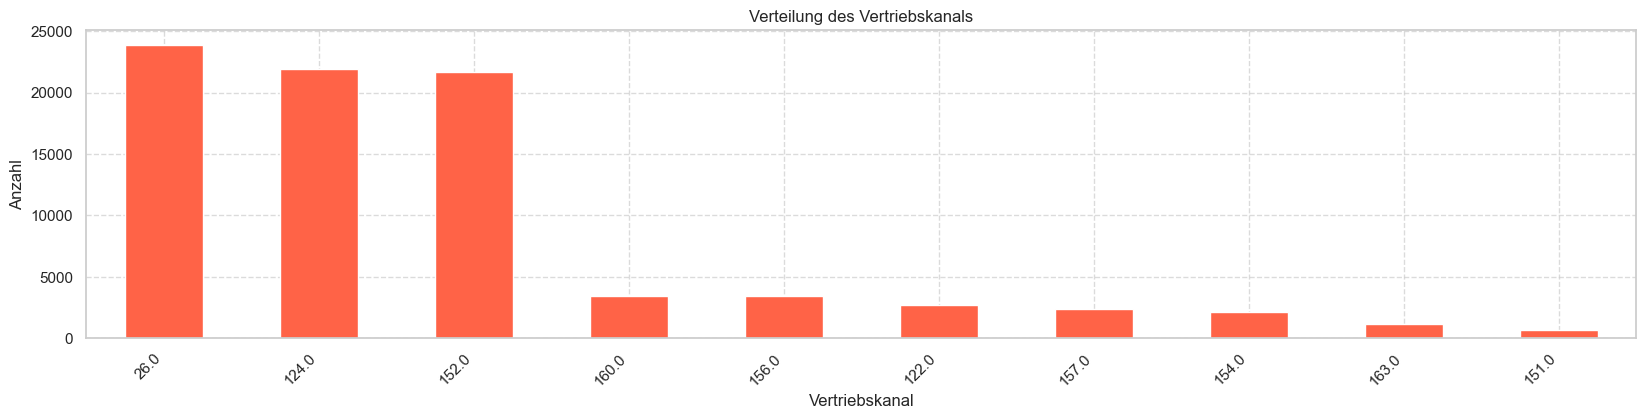

In [58]:
# Viele verschiedene Vertriebskanäle
# Umgehung der hohen Kardinalität durch Aggregation: Zusammenfassen zu Vertriebskanal 26, 124, 152 und Rest

df['Vertriebskanal'].value_counts().iloc[:10].plot(kind='bar', figsize=(20,4), color='tomato')

plt.xlabel('Vertriebskanal')
plt.ylabel('Anzahl')
plt.title('Verteilung des Vertriebskanals')

plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

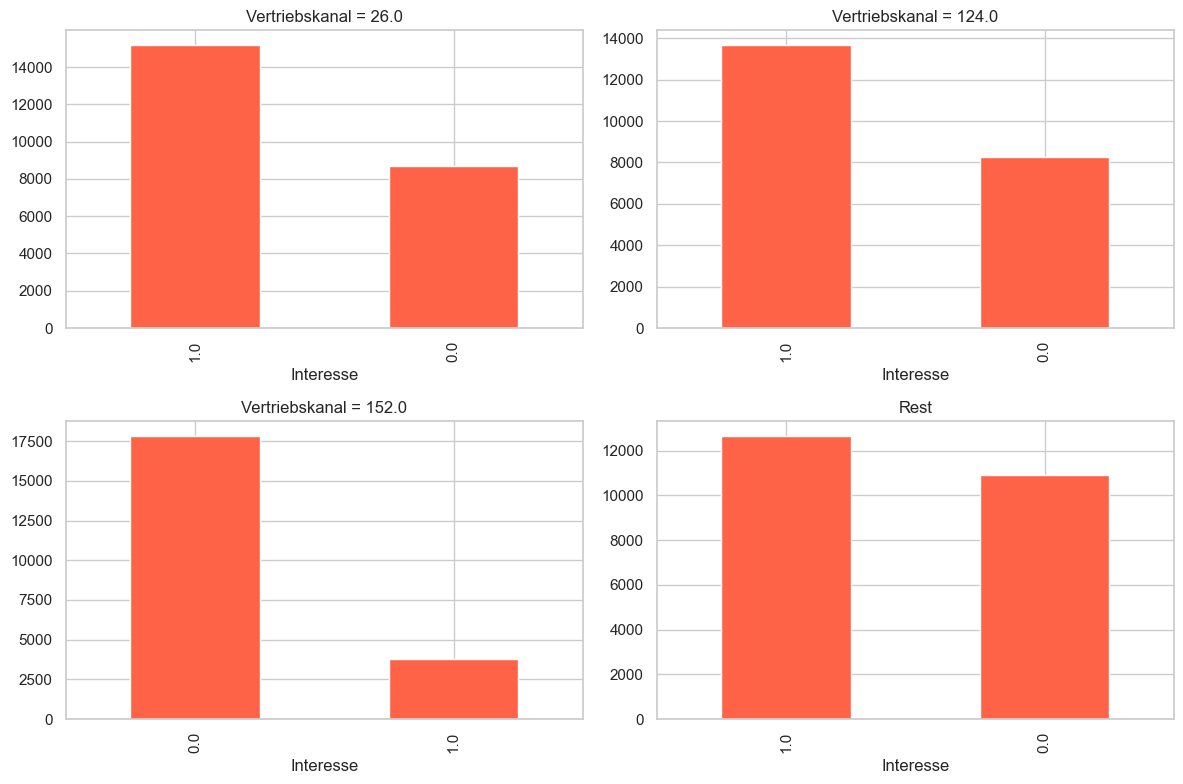

In [59]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
df.loc[df['Vertriebskanal'] == 26.0, 'Interesse'].value_counts().plot(kind='bar', color='tomato')
plt.title('Vertriebskanal = 26.0')

plt.subplot(2, 2, 2)
df.loc[df['Vertriebskanal'] == 124.0, 'Interesse'].value_counts().plot(kind='bar', color='tomato')
plt.title('Vertriebskanal = 124.0')

plt.subplot(2, 2, 3)
df.loc[df['Vertriebskanal'] == 152.0, 'Interesse'].value_counts().plot(kind='bar', color='tomato')
plt.title('Vertriebskanal = 152.0')

plt.subplot(2, 2, 4)
df.loc[~df['Vertriebskanal'].isin([26.0, 152.0, 124.0]), 'Interesse'].value_counts().plot(kind='bar', color='tomato')
plt.title('Rest')

plt.tight_layout()

plt.show()

In [62]:
#Klassen sind ausgeglichen
print(df.loc[df['Vertriebskanal'] == 26.0].shape[0])
print(df.loc[df['Vertriebskanal'] == 124.0].shape[0])
print(df.loc[df['Vertriebskanal'] == 152.0].shape[0])
print(df.loc[~df['Vertriebskanal'].isin([124.0, 152.0, 26.0])].shape[0])

23893
21952
21662
23613


In [65]:
#scheinbar ebenfalls sinnvolle Aggregation der Vertriebskanälen

# Feature Engineering

In [68]:
#Recap:

#Numerische Variablen: 
##Jahresbeitrag, Alter und Kundentreue werden verwendet
##Jahresbeitrag wurde um Ausreißer bereinigt
##Aber: Wertebereiche müssen noch transformiert werden

##Kategorische Variablen: 
## Keine Variable wird ausgeschlossen
#Aber: Umwandlung in numerische Werte, bzw. Encoding der kategorischen Variablen zur Verwendung in ML Modellen

In [69]:
df.head()

,id,Interesse,Geschlecht,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue
0,1,1.0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
2,3,1.0,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
7,8,1.0,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72
10,11,1.0,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46
15,16,1.0,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147


In [70]:
# Ausschluss nicht zu berücksichtigende Variablen
df = df.drop('id', axis=1)

## Kategorische Variablen

In [71]:
#Interesse - Umwandlung in integer, statt float
df['Interesse'] = df['Interesse'].astype('int')

In [72]:
#Umwandlung aller Kategorischen Variablen in numerische Werte, um für ML-Modelle nutzbar zu sein

In [73]:
#Geschlecht - Umwandlung mittels OneHot Encoding
dummies_geschlecht = pd.get_dummies(df['Geschlecht'])

df = pd.concat([df, dummies_geschlecht], axis=1)

#dabei wird neben der 'alten' Spalte 'Geschlecht' zusätzlich die Spalte 'Male' gelöscht aus Gründen der Kollinearität
df.drop(['Geschlecht', 'Female'], axis=1, inplace=True)

#Zusätzlich: Umwandlung von True/False in numerische Werte (=1/0)
df['Male'] = [1 if male == True else 0 for male in df['Male']]

df.head()

,Interesse,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,Male
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,1,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,0
10,1,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,0
15,1,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1


In [74]:
#Vorversicherung - liegt bereits numerisch vor -> Keine Änderung notwendig

In [75]:
#Alter_Fzg - Umwandlung mittels OneHot Encoding
dummies_alter = pd.get_dummies(df['Alter_Fzg'], prefix='Fahrzeugalter')

df = pd.concat([df, dummies_alter], axis=1)

#Eine Ausprägung als Feature löschen - Problematik der Kollinearität
df.drop(['Alter_Fzg', 'Fahrzeugalter_> 2 Years'], axis=1, inplace=True)

df['Fahrzeugalter_1-2 Year'] = [1 if age == True else 0 for age in df['Fahrzeugalter_1-2 Year']]
df['Fahrzeugalter_< 1 Year'] = [1 if age == True else 0 for age in df['Fahrzeugalter_< 1 Year']]
#df['Fahrzeugalter_> 2 Years'] = [1 if age == True else 0 for age in df['Fahrzeugalter_> 2 Years']]
df.head()

,Interesse,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,Male,Fahrzeugalter_1-2 Year,Fahrzeugalter_< 1 Year
0,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,0
2,1,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,0
7,1,56,1,28.0,0,Yes,32031.0,26.0,72,0,1,0
10,1,47,1,35.0,0,Yes,47576.0,124.0,46,0,1,0
15,1,37,1,6.0,0,Yes,2630.0,156.0,147,1,1,0


In [76]:
#Vorschaden - Lediglich umwandlung von Yes/No in 1/0
df['Vorschaden'] = [1 if schaden == 'Yes' else 0 for schaden in df['Vorschaden']]

In [77]:
#Regional Code - Umwandlung in 2 Ausprägungen: Code 28 = 1 oder nicht = 0 
df['Regional_Code'] = [1 if code == 28.0 else 0 for code in df['Regional_Code']]

In [78]:
#Vertriebskanal - 26, 124, 152, Rest
kanal_neu = []

for i in range(len(df)):
    kanal = df.iloc[i].Vertriebskanal
    
    if kanal == 26.0:
        kanal_neu.append(26)
    elif kanal == 124.0:
        kanal_neu.append(124)
    elif kanal == 152.0:
        kanal_neu.append(152)
    else:
        kanal_neu.append(0)

df['Vertriebskanal_Neu'] = kanal_neu

In [79]:
dummies_kanal = pd.get_dummies(df['Vertriebskanal_Neu'], prefix='Vertriebskanal')

df = pd.concat([df, dummies_kanal], axis=1)

df.drop(['Vertriebskanal', 'Vertriebskanal_Neu', 'Vertriebskanal_0'], axis=1, inplace=True)

#Eine Ausprägung als Feature löschen - Problematik der Kollinearität
#df['Vertriebskanal_0'] = [1 if kanal == True else 0 for kanal in df['Vertriebskanal_0']]
df['Vertriebskanal_26'] = [1 if kanal == True else 0 for kanal in df['Vertriebskanal_26']]
df['Vertriebskanal_124'] = [1 if kanal == True else 0 for kanal in df['Vertriebskanal_124']]
df['Vertriebskanal_152'] = [1 if kanal == True else 0 for kanal in df['Vertriebskanal_152']]

df.head()

,Interesse,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Vorschaden,Jahresbeitrag,Kundentreue,Male,Fahrzeugalter_1-2 Year,Fahrzeugalter_< 1 Year,Vertriebskanal_26,Vertriebskanal_124,Vertriebskanal_152
0,1,44,1,1,0,1,40454.0,217,1,0,0,1,0,0
2,1,47,1,1,0,1,38294.0,27,1,0,0,1,0,0
7,1,56,1,1,0,1,32031.0,72,0,1,0,1,0,0
10,1,47,1,0,0,1,47576.0,46,0,1,0,0,1,0
15,1,37,1,0,0,1,2630.0,147,1,1,0,0,0,0


## Numerische Variablen

In [80]:
#Transformation der unterschiedlichen Wertebereiche
#Ansonsten läuft man Gefahr, dass manche Feature aufgrund ihres hohen Wertebereichs stärker gewichtet werden

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [86]:
##Einschub: Transformationsverfahren nur auf Trainingsdatensatz anwenden
##Daher vorher: Jetzt bereits Aufspaltung in Trainings- und Testdatensatz

In [87]:
#Definition von Features und Zielvariable
#X = df.drop(['Interesse', 'Fahrerlaubnis'], axis=1)
X = df.drop('Interesse', axis=1)
y = df['Interesse']

In [88]:
from sklearn.model_selection import train_test_split

#Aufteilungsverhältnis Trainings-/Testdaten: 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72838, 13)
(18210, 13)
(72838,)
(18210,)


In [90]:
#Alter
alter_train = X_train[['Alter']].values
alter_test = X_test[['Alter']].values

#Transformieren mittels Trainingsdaten
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(alter_train)

X_train['Alter'] = scaler.transform(alter_train)
X_test['Alter'] = scaler.transform(alter_test)

#Jahresbeitrag
jahresbeitrag_train = X_train[['Jahresbeitrag']].values
jahresbeitrag_test = X_test[['Jahresbeitrag']].values

#Transformieren mittels Trainingsdaten
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(jahresbeitrag_train)

X_train['Jahresbeitrag'] = scaler.transform(jahresbeitrag_train)
X_test['Jahresbeitrag'] = scaler.transform(jahresbeitrag_test)

#Kundentreue
kundentreue_train = X_train[['Kundentreue']].values
kundentreue_test = X_test[['Kundentreue']].values

#Transformieren mittels Trainingsdaten
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(kundentreue_train)

X_train['Kundentreue'] = scaler.transform(kundentreue_train)
X_test['Kundentreue'] = scaler.transform(kundentreue_test)

In [91]:
X_train.head()

,Alter,Fahrerlaubnis,Regional_Code,Vorversicherung,Vorschaden,Jahresbeitrag,Kundentreue,Male,Fahrzeugalter_1-2 Year,Fahrzeugalter_< 1 Year,Vertriebskanal_26,Vertriebskanal_124,Vertriebskanal_152
369601,0.061538,1,0,0,1,0.354623,0.612457,0,0,1,0,0,1
241633,0.123077,1,1,1,0,0.577595,0.546713,0,0,1,0,0,1
10006,0.553846,1,0,1,0,0.485391,0.882353,1,1,0,0,1,0
81831,0.492308,1,0,1,0,0.640057,0.411765,1,1,0,1,0,0
291933,0.030769,1,0,1,0,0.597630,0.608997,0,0,1,0,0,1


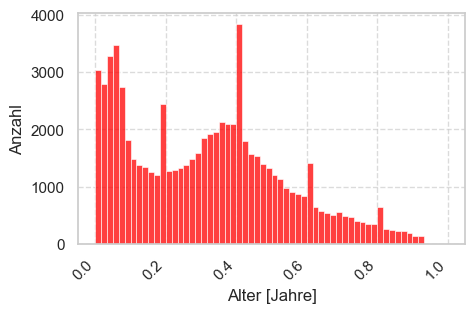

In [92]:
#Beispiel: Alter
plt.figure(figsize=(5,3))
sns.histplot(X_train['Alter'],color='red')

plt.xlabel('Alter [Jahre]')
plt.ylabel('Anzahl')

# X-Achse besser lesbar machen
plt.xticks(rotation=45, ha='right')

# Gitterlinien hinzufügen
plt.grid(True, linestyle='--', alpha=0.7)

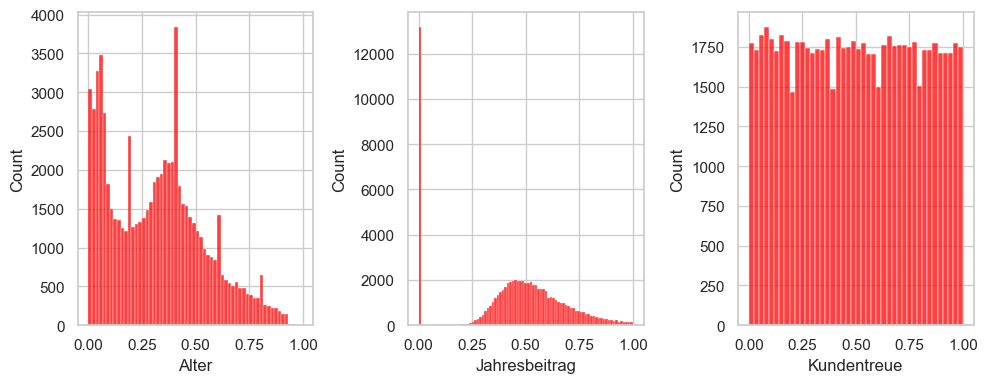

In [93]:
plt.figure(figsize=(10,4))

plt.subplot(131)
sns.histplot(X_train['Alter'],color='red')

plt.subplot(132)
sns.histplot(X_train['Jahresbeitrag'],color='red')

plt.subplot(133)
sns.histplot(X_train['Kundentreue'],color='red')

plt.tight_layout()

# Modellvergleich

In [94]:
#Zugrundeliegendes Problem: Prognose der Kundenaffinität, gemessen durch das Interesse
df['Interesse'].value_counts()

Interesse
0    45663
1    45385
Name: count, dtype: int64

In [95]:
#Bedarf eines Klassifikationsmodells, das auf Basis der Features vorhersagt, ob ein Kunde Interesse hat oder nicht

## 1. Vergleich mehrerer verschiedener Basic-Modelle

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [97]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.62      0.75      9086
           1       0.72      0.95      0.82      9124

    accuracy                           0.79     18210
   macro avg       0.82      0.79      0.78     18210
weighted avg       0.82      0.79      0.78     18210



In [98]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      9086
           1       0.72      0.70      0.71      9124

    accuracy                           0.71     18210
   macro avg       0.71      0.71      0.71     18210
weighted avg       0.71      0.71      0.71     18210



In [99]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      9086
           1       0.73      0.84      0.79      9124

    accuracy                           0.77     18210
   macro avg       0.78      0.77      0.77     18210
weighted avg       0.78      0.77      0.77     18210



In [100]:
#Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      9086
           1       0.73      0.92      0.82      9124

    accuracy                           0.79     18210
   macro avg       0.82      0.79      0.79     18210
weighted avg       0.81      0.79      0.79     18210



In [101]:
#K Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75      9086
           1       0.73      0.84      0.78      9124

    accuracy                           0.77     18210
   macro avg       0.77      0.77      0.76     18210
weighted avg       0.77      0.77      0.76     18210



In [102]:
# Favorisiertes Modell: Random Forest (s.u.) - Keine auffallend schlechtere Performanz als andere Klassifikationsmodelle

## 2. Auswahl basierend auf theoretischer Begründung

- Random Forests weisen eine gute Performanz auf, insb. da sie auf Ensemble-Learning beruhen [1][2][5]
- Reduzierte Problematik von Overfitting, da Ensemble-Learning [3][4]
- Gut Interpretierbar [2][6]
- Möglichkeit eine Feature Importance zu berechnen [9]

- Support Vector Machines, die ein wenig bessere Performanz aufweisen ist weniger leicht nachzuvollziehen, sind schwieriger zu implementieren bzgl. der korrekten Verwendung der Hyperparameter, sind anfälliger für Overfitting und benötigen mehr Trainingszeit [7][8]

**Quellen**

- [1] https://www.mygreatlearning.com/blog/random-forest-algorithm/
- [2] https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/#:~:text=Advantages%20of%20random%20forest&text=A%20random%20forest%20produces%20good,over%20the%20decision%20tree%20algorithm.
- [3] http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-random.html
- [4] https://builtin.com/data-science/random-forest-algorithm
- [5] https://medium.com/geekculture/random-forest-ensemble-method-860aaf4fcd16
- [6] https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
- [7] https://botbark.com/2019/12/19/top-5-advantages-and-disadvantages-of-support-vector-machine-algorithm/
- [8] https://holypython.com/svm/support-vector-machine-pros-cons/?expand_article=1
- [9] https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# Modellbuilding

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [108]:
# Initialisierung des Modells
rf_model = RandomForestClassifier(class_weight='balanced')

# Definition der Hyperparameter für GridSearch
#param_grid = {
#    'n_estimators': [200, 400, 800],
#    'max_depth': [None, 10, 20, 40],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
    #'bootstrap':[True, False]
#}

# Definition der Hyperparameter für GridSearch
param_grid = {
    'max_depth':[None ,5, 10, 20],
    'n_estimators':[10, 100, 200, 400, 800],
    'bootstrap':[True, False]
    #'max_features':[1,3,5,7],
    #'min_samples_leaf':[1,2,3],
    #'min_samples_split':[1,2,3]
}

#Durchführen von GridSearch zur identifikation optimaler Parameter
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Speichern der besten Parameter & des besten Modells
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Beste Parameter:", best_params)
print("\nBestes Modell:", best_model)

# Vorhersagen auf Testdaten machen
y_pred = best_model.predict(X_test)

/Users/ericaltehoefer/opt/anaconda3/envs/coding-challenge/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Beste Parameter: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}

Bestes Modell: RandomForestClassifier(class_weight='balanced', max_depth=10)


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      9086
           1       0.73      0.93      0.82      9124

    accuracy                           0.80     18210
   macro avg       0.82      0.80      0.79     18210
weighted avg       0.82      0.80      0.79     18210



Text(0.5, 0, 'Feature Importance')

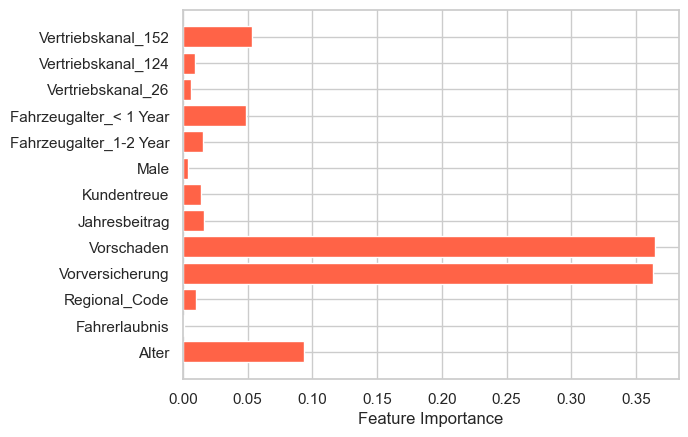

In [113]:
#Darstellung der Wichtigkeit unterschiedlicher Features zur Prognose der Kundenaffinität
plt.barh(
    X_train.columns,
    best_model.feature_importances_,
    color='tomato'
)

plt.xlabel('Feature Importance')


In [114]:
#Insb. sind die Variablen Vorschaden und Vorversicherung für die Prognose von Kundenaffinität von Relevanz

#Wie vermutet scheinen Kundentreue, Jahresbeitrag und Fahrerlaubnis irrelevsnt zu sein

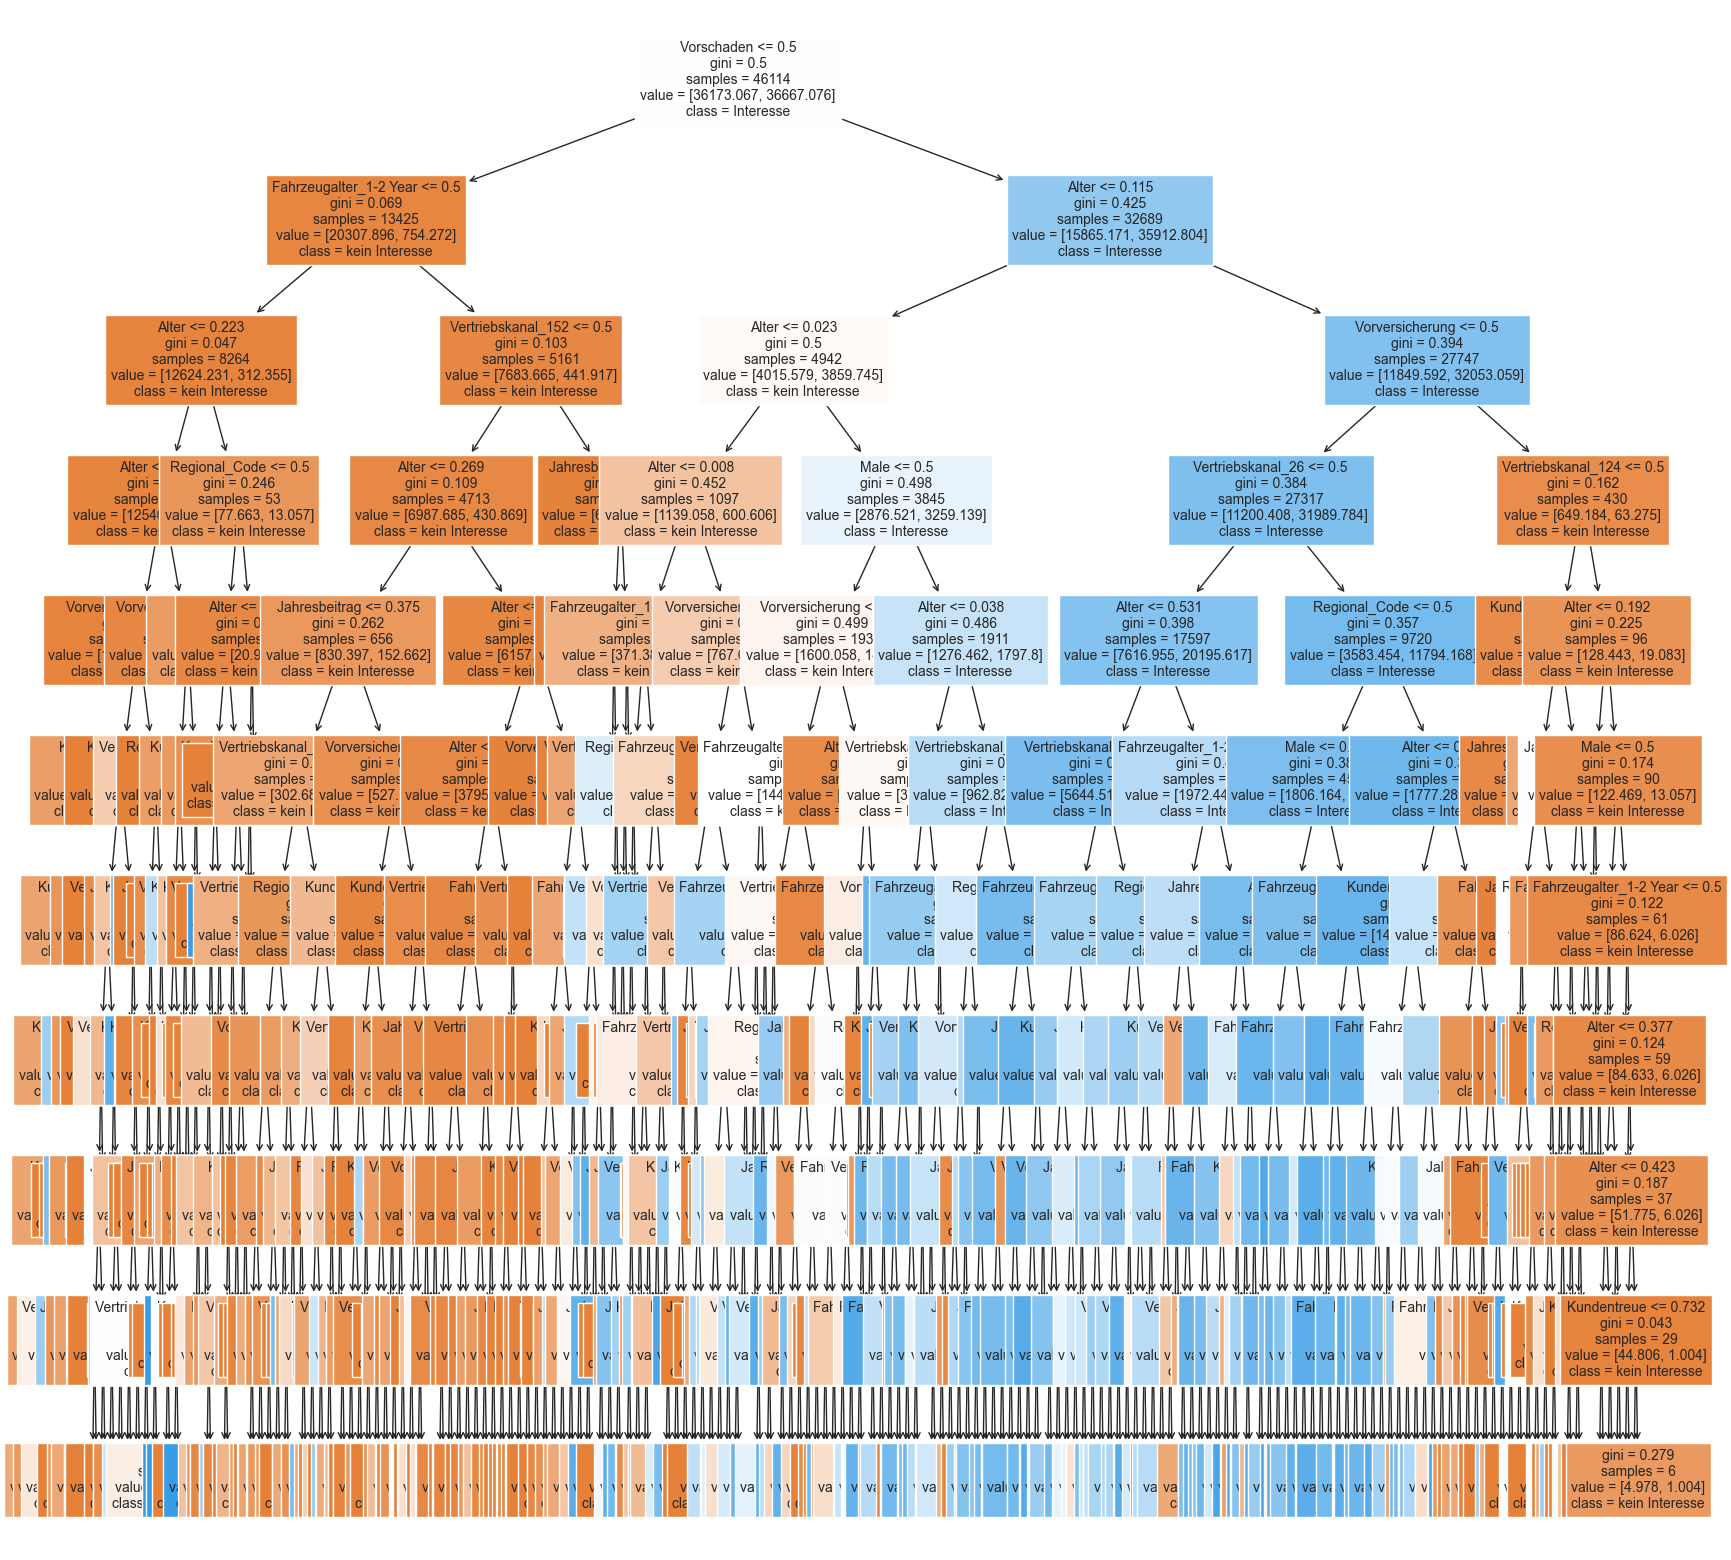

In [120]:
from sklearn.tree import export_graphviz

# Einzelnen Entscheidungsbaum auswählen
estimator = best_model.estimators_[5]

plt.figure(figsize=(20,20))
tree.plot_tree(
    estimator,
    fontsize=10,
    feature_names=X_train.columns.tolist(), 
    class_names=['kein Interesse', 'Interesse'], 
    filled=True
);

## Potential zur Optimierung

In [121]:
## Besser Vorbereitung der Daten, Behandung der Schiefe 

## Nichtberücksichtigung von potenziell irrelevanten Features

## Random Oversampling oder andere Methoden um die Unausgeglichenheit der Variable Interesse zu behandeln

## Stärkeres Hyperparameter-Tuning mittels Grid- oder RandomSearch

## Alternative Ensemble-Modelle, basierend au Boosting (AdaBoost/XGBoost)